In [127]:
using Compose

In [276]:
function draw_lines(layers,x_pos,y_pos,C,count)
    number_of_next_nodes = layers[count+1] 
    y_pos_next = 0
    while number_of_next_nodes > 0
        push!(C,compose(context(), linewidth(0.3mm), stroke("black"),line([(x_pos+0.025,y_pos+0.025),(x_pos+0.15,y_pos_next+0.025)])))
        number_of_next_nodes = number_of_next_nodes-1
        y_pos_next = y_pos_next+0.08
    end
end

function draw_neural_net(layer_dimensions,x,w,h,colors_array)
    count = 1
    C=[]
    start_points = []
    end_points = []
    lines = []
    for layer in layer_dimensions
        y = 0
        j_points = []
        number_of_nodes = layer_dimensions[count]
        color_string = colors_array[2]
        if count == 1
            color_string = colors_array[1]
        elseif count == length(layer_dimensions)
            color_string = colors_array[3]
        end
        while number_of_nodes > 0
            push!(C,compose(context(x,y,0.05,0.05),circle(),fill(color_string)))
            number_of_nodes = number_of_nodes-1
            if count < length(layer_dimensions)
                draw_lines(layer_dimensions,x,y,C,count)
            end
            y = y+0.08
        end
        x = x+0.15
        count=count+1
    end
    network = compose(context(),C...)
    network |> SVG("network.svg",w,h)
    network
end

draw_neural_net (generic function with 4 methods)

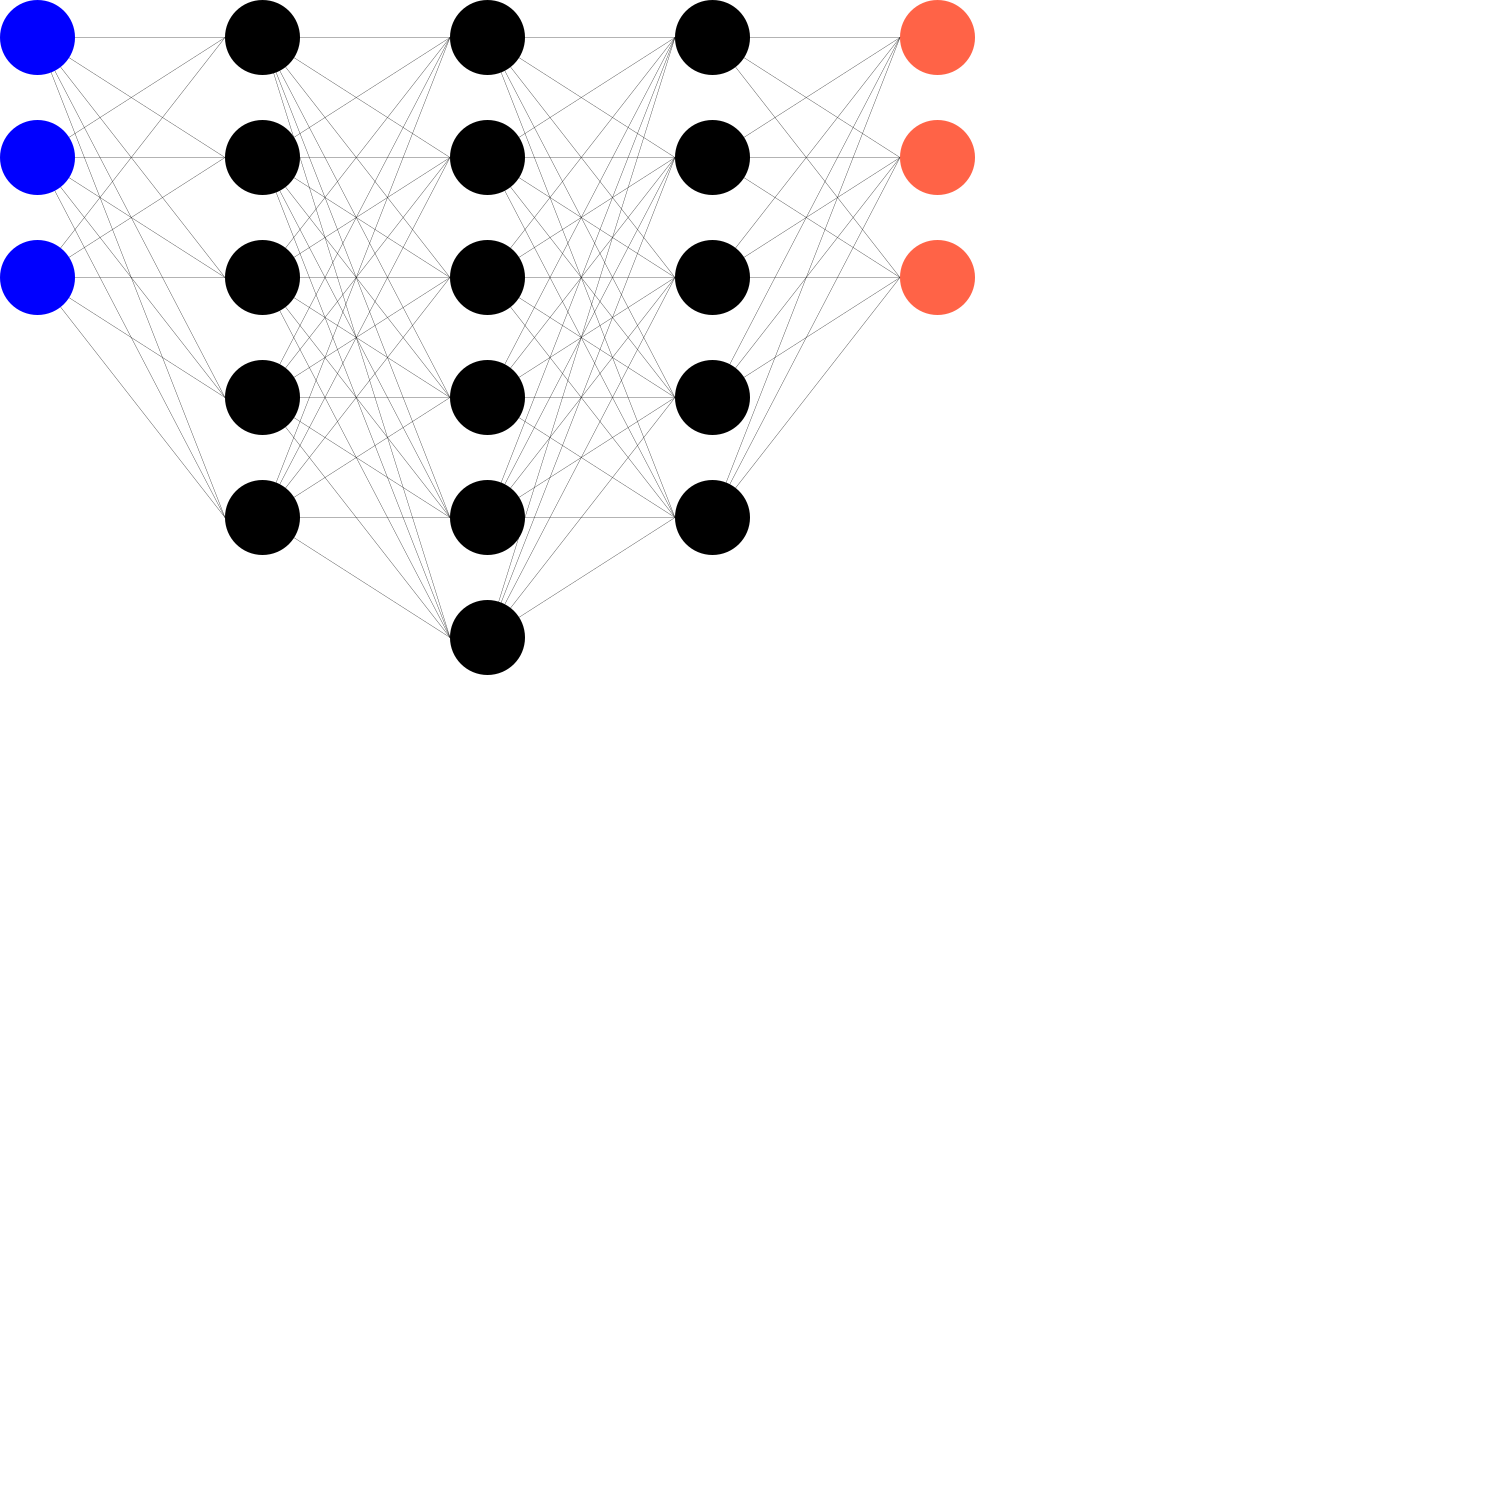

In [277]:
set_default_graphic_size(150cm,150cm)
draw_neural_net([3,5,6,5,3],0,10cm,10cm,["blue","black","tomato"])